# <img style="float: left; padding-right: 20px; width: 200px" src="https://raw.githubusercontent.com/raxlab/imt2200/main/media/logo.jpg">  IMT 2200 - Introducción a Ciencia de Datos
**Pontificia Universidad Católica de Chile**<br>
**Instituto de Ingeniería Matemática y Computacional**<br>
**Semestre 2023-1**<br>
**Profesor:** Rodrigo A. Carrasco <br>
---

# <h1><center>Clase 03: Trabajo con Datos Estructurados</center></h1>

Este ejercicio busca que los estudiantes usen algunas librerías para importar datos y luego aprendan algunos comandos de Pandas para analizar e inspeccionar los datos.

## 1. Datos para los ejemplos

Usaremos dos conjuntos de datos para este Notebook:
<ol>
<li>Datos de viajes en Taxi en la ciudad de Nueva York:</li>

El proyecto <i>Open Data</i> de la Ciudad de Nueva York nos da acceso a una gran cantiadad de datos del quehacer de la ciudad. En este caso usaremos el sitio con los datos de viajes en Taxi, disponibles en https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page
    
En la carpeta '`data`' está disponible la base de datos de todos los viajes realizados en Mayo de 2023. El archivo se llama '`yellow_tripdata_2023-05.parquet`'.

El formato PARQUET, que es open-source desarrollado por Apache, es un formato eficiente para almacenar y leer bases de datos de gran tamaño. Para poder leer este formato desde Python, deberán instalar una nueva librería llamada ' `pyarrow` '. Para instalarla use el comando:

<code>> conda install pyarrow</code>
    
<li>Datos de casos de COVID en Chile:</li>

Durante la pandemia, el Ministerio de Ciencia y Tecnología, con el apoyo de múltiples grupos de investigación y universidades, armó un repositorio abierto de datos sobre la situación de la pandemia en Chile. Los datos a utilizar en este ejemplo provienen del repositorio GitHub **Datos-COVID19** disponible en https://github.com/MinCiencia/Datos-COVID19. Estaremos usando el 

"*Data Product 1 - Casos totales por comuna incremental: el archivo Covid-19.csv contiene las columnas 'Región', ‘Código Región’, 'Comuna', ‘Código comuna’, 'Población', múltiples columnas correspondientes a '[fecha]', y una columna 'Tasa'. Estas últimas columnas, ‘[fecha]’, contienen los 'Casos Confirmados' reportados por el Ministerio de Salud de Chile en cada una de las fechas que se indican en las respectivas columnas.*" https://github.com/MinCiencia/Datos-COVID19/tree/master/output/producto1

En la carpeta '`data`' está disponible la base de datos de todos los casos confirmados hasta enero de 2023.
</ol>

## 2. Librerías

El trabajo de esta clase se centrará en el uso de NumPy y Pandas, pero necesitamos otras librerías adicionales para leer los datos y graficar información.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pyarrow.parquet as pq

## 3. Navegación en carpetas y acceso a datos

Para improtar los archvios de datos, necesitamos identificar en qué directorio están guardados en nuestro sistema y en qué directorio estamos trabajando ("working directory").

Algunos comandos importantes:
- `%ls`: lista el contenido del directorio actual command lists all content in the current working directory.
- `%cd 'subdirectorio'`: permite cambiar la ubicación actual a 'subdirectorio'
- `%cd ..`: permite navegar hacia atrás al directorio superior del actual
- `%pwd`: entrega la ruta del directorio actual
      

In [2]:
%pwd

'C:\\Users\\rodri\\OneDrive\\Personal\\UC\\courses\\IMC pregrado\\imt2200 introducción a ciencia de datos\\lectures\\clase 03'

In [3]:
%ls

 Volume in drive C has no label.
 Volume Serial Number is 104F-17BC

 Directory of C:\Users\rodri\OneDrive\Personal\UC\courses\IMC pregrado\imt2200 introducci¢n a ciencia de datos\lectures\clase 03

08/21/2023  11:47 AM    <DIR>          .
08/21/2023  11:47 AM    <DIR>          ..
08/21/2023  11:43 AM    <DIR>          .ipynb_checkpoints
08/16/2023  04:34 PM         1,598,291 3 Tipos de datos.pdf
08/16/2023  04:33 PM        16,102,192 3 Tipos de datos.pptx
08/16/2023  06:39 PM    <DIR>          data
08/21/2023  11:46 AM            87,826 IMT2200_Clase_03.ipynb
               3 File(s)     17,788,309 bytes
               4 Dir(s)  488,429,350,912 bytes free


In [4]:
%cd data

C:\Users\rodri\OneDrive\Personal\UC\courses\IMC pregrado\imt2200 introducción a ciencia de datos\lectures\clase 03\data


## 4. Estudio de datos de viajes en NYC

El objetivo de este ejercicio es entender cuántos viajes ocurrieron en la ciudad de Nueva York durante mayo de 2023 y cuáles son los lugares más relevantes para tomar pasajeros.

### 4.1 Importar datos

El primer paso será importar los datos, que están en un archivo en formato Parquet, y pasarlos a un DataFrame de Pandas.

In [5]:
# leer la base parquet
trips = pq.read_table('yellow_tripdata_2023-05.parquet')

### 4.2 `pandas` y DataFrames

El método `<x>.to_pandas()` permite transformar el archivo Parquet en un DataFrame de Pandas.
Un DataFrame es una base de datos estructurada, que posee columnas y filas con la información relevante. Una referencia rápida a varias cosas que se pueden hacer con DataFrames está disponible acá: https://pandas.pydata.org/pandas-docs/stable/user_guide/10min.html

In [6]:
# transformar a dataframe de pandas
trips = trips.to_pandas()

### 4.3 Leer e inspeccionar un DataFrame

Un DataFrame de Pandas posee una serie de métodos que permiten revisar los datos contenidos en el DataFrame. Algunos de los más relevantes los vemos a continuación.

In [7]:
trips.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
0,1,2023-05-01 00:33:13,2023-05-01 00:53:01,0.0,7.80,1.0,N,138,43,1,33.8,7.75,0.5,8.60,0.00,1.0,51.65,0.0,1.75
1,1,2023-05-01 00:42:49,2023-05-01 01:11:18,2.0,8.10,1.0,N,138,262,1,35.9,10.25,0.5,9.50,0.00,1.0,57.15,2.5,1.75
2,1,2023-05-01 00:56:34,2023-05-01 01:13:39,2.0,9.10,1.0,N,138,141,1,35.2,10.25,0.5,10.70,6.55,1.0,64.20,2.5,1.75
3,2,2023-05-01 00:00:52,2023-05-01 00:20:12,1.0,8.21,1.0,N,138,140,1,33.1,6.00,0.5,2.24,0.00,1.0,47.09,2.5,1.75
4,1,2023-05-01 00:05:50,2023-05-01 00:19:41,0.0,7.90,1.0,N,138,263,1,31.0,10.25,0.5,9.85,6.55,1.0,59.15,2.5,1.75


In [8]:
trips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3513649 entries, 0 to 3513648
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int32         
 1   tpep_pickup_datetime   datetime64[ns]
 2   tpep_dropoff_datetime  datetime64[ns]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int32         
 8   DOLocationID           int32         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  Airport_fee           

In [9]:
# nombres de las columnas
trips.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'Airport_fee'],
      dtype='object')

In [10]:
# obtener los datos de una columna
trips["trip_distance"]

0           7.80
1           8.10
2           9.10
3           8.21
4           7.90
           ...  
3513644     2.18
3513645     0.67
3513646     0.00
3513647    13.95
3513648     3.37
Name: trip_distance, Length: 3513649, dtype: float64

In [11]:
# obtener una fila del DataFrame
trips["trip_distance"][1]

8.1

### 4.4 Contestando la pregunta

A continuación haremos una serie de cálculos para contestar nuestra pregunta inicial: ¿Cuál es el mejor lugar en NYC para tomar pasajeros?

Cada columna de un DataFrame es una Serie, que corresponde a un arreglo 1-D con una etiqueta. Por lo tanto, en el caso de columnas con datos numéricos, podemos aplicar todas las operaciones matemáticas disponibles en `numpy`: https://numpy.org/doc/stable/reference/routines.math.html

Partamos con la cantidad total de pasajeros que viajaron en Mayo de 2023.

In [12]:
# suma de la columna de pasajeros
total_pasajeros = trips["passenger_count"].sum()
print(f'La cantidad total de pasajeros fue de {total_pasajeros}')

La cantidad total de pasajeros fue de 4636025.0


In [13]:
# ahora veamos esa suma por cada zona
trips_by_loc = trips[["PULocationID", "passenger_count"]].groupby("PULocationID").sum()
trips_by_loc.head()

,passenger_count
PULocationID,
1,806.0
2,1.0
3,61.0
4,4777.0
5,58.0


In [14]:
max_loc = trips_by_loc.idxmax()
max_loc

passenger_count    132
dtype: int64

In [15]:
trips_by_loc.loc[max_loc]

,passenger_count
PULocationID,
132,257867.0


¿Era esperable el resultado?

Acá pueden ver un mapa con el ID de los diferentes lugares:

<img style="float: left; padding-right: 20px; width: 500px" src="https://www.nyc.gov/assets/tlc/images/content/pages/about/taxi_zone_map_queens.jpg">

### 4.5 Puntaje de premio

Con esto, ¿Cómo podríamos calcular el mejor horario y lugar durante la semana laboral en el cual recoger pasajeros en NYC? 

Los tres primeros estudiantes que manden a nuestro correo el Jupyter Notebook con el código implementado para contestar esta pregunta tendrán 0.1 adicional en la Tarea 01. Debe venir la salida indicando el horario correspondiente y el código de cómo lo lograron calcular.

#### Posible forma de abordar el problema

La siguiente es la respuesta entergada por Vicente Muñoz a esta pregunta, calculando por separado el mejor horario y el mejor lugar durante la semana:

In [16]:
# Respuesta de Vicente Muñoz

# Mejor horario por dia laboral

trips_and_hour = trips[["tpep_pickup_datetime", "passenger_count", "PULocationID"]].copy()

#En python segun la documentacion https://docs.python.org/3/library/datetime.html los se puede usar weekday de 0 lunes hasta el 6 domingo
#Asi que los dias laborales son [0, 4] para eso el weekday < 5
trips_and_hour = trips_and_hour[trips_and_hour['tpep_pickup_datetime'].dt.weekday < 5]

#el .hour nos devuelve la hora de las 0 hasta las 23
trips_and_hour['hora'] = trips_and_hour['tpep_pickup_datetime'].dt.hour

#agrupar los pasejeros por hora
trips_by_hora = trips_and_hour[["hora", "passenger_count"]].groupby("hora").sum()

#en la documentacion se puede ordener asi por lo que la hora con mas pasajero en dia labrola es a las 18h
trips_by_hora_sorted = trips_by_hora.sort_values(by='passenger_count', ascending=False)
trips_by_hora_sorted.head(5)

,passenger_count
hora,
18,256649.0
17,236828.0
19,230034.0
21,217037.0
15,216656.0


In [17]:
# Respuesta de Vicente Muñoz

trips_daywork_loc = trips[["tpep_pickup_datetime", "passenger_count", "PULocationID"]].copy()

trips_daywork_loc = trips_daywork_loc[trips_daywork_loc['tpep_pickup_datetime'].dt.weekday < 5]

trips_daywork_loc = trips[["PULocationID", "passenger_count"]].groupby("PULocationID").sum()
trips_daywork_loc = trips_daywork_loc.sort_values(by='passenger_count', ascending=False)
trips_daywork_loc.head(5)

#Por lo que la Location 132 es la mejor para recoger pasajeros en dia laboral

,passenger_count
PULocationID,
132,257867.0
237,224815.0
161,215751.0
236,196753.0
138,176528.0


#### Posible forma de abordar el problema

La siguiente es la respuesta entergada por Tomás Romero a esta pregunta, calculando en forma conjunta el horario y lugar. El horario sigue siendo el mismo, pero el lugar cambia al filtrar:

In [18]:
#Seleccionamos las columnas que nos interesan
trips_by_hour_and_loc = trips[["passenger_count", "tpep_pickup_datetime", "PULocationID"]]

#Seleccionamos los dias de la semana laboral
trips_by_hour_and_loc = trips_by_hour_and_loc[trips_by_hour_and_loc["tpep_pickup_datetime"].apply(lambda x: x.day_name()) != "Saturday"]
trips_by_hour_and_loc = trips_by_hour_and_loc[trips_by_hour_and_loc["tpep_pickup_datetime"].apply(lambda x: x.day_name()) != "Sunday"]

#Agrupamos por hora y contamos
trips_by_hour_and_loc["hour"] = trips_by_hour_and_loc["tpep_pickup_datetime"].apply(lambda x: x.hour)
trips_by_hour_and_loc = trips_by_hour_and_loc.groupby(["hour", "PULocationID"]).count()

trips_by_hour_and_loc = trips_by_hour_and_loc.drop(columns=["tpep_pickup_datetime"])

#Ordenamos de forma descendente por la cantidad de pasajeros
#De esta manera obtenemos los mejores horarios y lugares para recoger pasajeros en New York
trips_by_hour_and_loc.sort_values(by='passenger_count', ascending=False).head()

,,passenger_count
hour,PULocationID,
18,161,11513
19,161,10758
18,237,10737
14,237,10704
17,161,10692


## 5. Estudio de datos de enfermos COVID

El primer paso es importar los datos estructurados del CSV. Para ello, podemos usar una librería de NumPy que permite importar datos en formato CSV directamente.

### 5.1 `numpy`: np.loadtxt() y np.genfromtxt()

Numpy provee funciones para leer archivos de texto estructurado directamente como arreglos (`np.ndarray`). 

En primer lugar la función `np.loadtxt()`, permite cargar archivos cuyo contenido es solamente numérico. Generalmente trabajaremos con datasets que tienen distintos tipos de datos en distintas columnas; por ejemplo, strings y floats. En este caso, es necesario utilizar la función `np.genfromtxt()`, que puede manejar este tipo de datos. Si usamos como argumento `dtype=None`, la función infiere el tipo de datos de cada columna en forma automática.

La documentación de ambas funciones se encuentra en: <br>
- https://numpy.org/doc/stable/reference/generated/numpy.loadtxt.html
- https://numpy.org/doc/stable/reference/generated/numpy.genfromtxt.html

In [19]:
# nombre del archivo a leer
data_file='Covid-19.csv'

In [20]:
# cargar el archivo
data = np.loadtxt(data_file, delimiter=',',dtype='str')#skiprows=1

# Algunas formas de explorar los datos:
print(data[1])
#print(data.shape)
#print(data)

['Arica y Parinacota' '15' 'Arica' '15101' '247552.0' '6.0' '6.0' '12.0'
 '41.0' '63.0' '87.0' '115.0' '124.0' '134.0' '166.0' '224.0' '270.0'
 '297.0' '310.0' '328.0' '353.0' '371.0' '405.0' '477.0' '525.0' '596.0'
 '653.0' '806.0' '904.0' '1046.0' '1176.0' '1371.0' '1533.0' '1758.0'
 '1887.0' '2139.0' '2464.0' '2721.0' '3123.0' '3372.0' '3882.0' '4211.0'
 '4636.0' '4874.0' '5220.0' '5543.0' '5907.0' '6131.0' '6374.0' '6577.0'
 '6783.0' '6969.0' '7172.0' '7344.0' '7503.0' '7646.0' '7819.0' '7948.0'
 '8134.0' '8332.0' '8597.0' '8772.0' '8996.0' '9138.0' '9343.0' '9472.0'
 '9679.0' '9763.0' '9888.0' '9974.0' '10103.0' '10208.0' '10294.0'
 '10363.0' '10443.0' '10489.0' '10530.0' '10586.0' '10630.0' '10672.0'
 '10720.0' '10798.0' '10875.0' '10934.0' '11028.0' '11080.0' '11212.0'
 '11296.0' '11434.0' '11650.0' '11886.0' '12171.0' '12453.0' '12711.0'
 '13047.0' '13335.0' '13606.0' '13885.0' '14168.0' '14427.0' '14734.0'
 '15007.0' '15358.0' '15627.0' '15978.0' '16253.0' '16614.0' '16913.0'


In [21]:
# Importar data como floats y saltar la primera fila: data_float
data = np.genfromtxt(data_file, delimiter=',', dtype=None, skip_header=1, encoding=None)

print(data[0])
print(data.shape)

#numpy se las puede arreglar con datos mezclados pero es mejor pandas

('Arica y Parinacota', 15, 'Arica', 15101, 247552., 6., 6., 12., 41., 63., 87., 115., 124., 134., 166., 224., 270., 297., 310., 328., 353., 371., 405., 477., 525., 596., 653., 806., 904., 1046., 1176., 1371., 1533., 1758., 1887., 2139., 2464., 2721., 3123., 3372., 3882., 4211., 4636., 4874., 5220., 5543., 5907., 6131., 6374., 6577., 6783., 6969., 7172., 7344., 7503., 7646., 7819., 7948., 8134., 8332., 8597., 8772., 8996., 9138., 9343., 9472., 9679., 9763., 9888., 9974., 10103., 10208., 10294., 10363., 10443., 10489., 10530., 10586., 10630., 10672., 10720., 10798., 10875., 10934., 11028., 11080., 11212., 11296., 11434., 11650., 11886., 12171., 12453., 12711., 13047., 13335., 13606., 13885., 14168., 14427., 14734., 15007., 15358., 15627., 15978., 16253., 16614., 16913., 17431., 17771., 18370., 18637., 19157., 19396., 19845., 20142., 20550., 20894., 21325., 21692., 22130., 22415., 22821., 23137., 23547., 23856., 24247., 24548., 24929., 25231., 25609., 25913., 26258., 26531., 26916., 27195

En general, `numpy` hace un buen trabajo identificando los tipos en conjuntos de datos con tipos mezclados, pero la librería natural para trabajar con datos estructurados es `pandas`.

### 5.2 `pandas`: read_csv para pasar a DataFrame

La función `pd.read_csv()` permite leer un archivo de texto en formato CSV (comma separated value) y generar un DataFrame.
El delimitador por defecto es la coma (,), pero también pueden leerse datasets con otros tipos de separación, especificando el parámetro `delimiter`.

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html

In [22]:
# leer los datos
data = pd.read_csv(data_file, delimiter=',')
data.head()

,Region,Codigo region,Comuna,Codigo comuna,Poblacion,30-03-2020,01-04-2020,03-04-2020,06-04-2020,08-04-2020,...,09-12-2022,12-12-2022,16-12-2022,19-12-2022,23-12-2022,26-12-2022,30-12-2022,05-01-2023,09-01-2023,Tasa
0,Arica y Parinacota,15,Arica,15101.0,247552.0,6.0,6.0,12.0,41.0,63.0,...,79891.0,80139.0,80584.0,80924.0,81364.0,81713.0,82516.0,82960.0,83092.0,33512.2
1,Arica y Parinacota,15,Camarones,15102.0,1233.0,0.0,0.0,0.0,0.0,0.0,...,205.0,207.0,207.0,208.0,212.0,213.0,215.0,216.0,216.0,17518.2
2,Arica y Parinacota,15,General Lagos,15202.0,810.0,0.0,0.0,0.0,0.0,0.0,...,116.0,116.0,116.0,116.0,117.0,118.0,119.0,122.0,123.0,15061.7
3,Arica y Parinacota,15,Putre,15201.0,2515.0,0.0,0.0,0.0,0.0,0.0,...,550.0,550.0,553.0,558.0,561.0,568.0,586.0,593.0,595.0,23578.5
4,Arica y Parinacota,15,Desconocido Arica y Parinacota,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,228.0,228.0,228.0,228.0,228.0,228.0,228.0,228.0,228.0,NaN


In [23]:
data.columns

Index(['Region', 'Codigo region', 'Comuna', 'Codigo comuna', 'Poblacion',
       '30-03-2020', '01-04-2020', '03-04-2020', '06-04-2020', '08-04-2020',
       ...
       '09-12-2022', '12-12-2022', '16-12-2022', '19-12-2022', '23-12-2022',
       '26-12-2022', '30-12-2022', '05-01-2023', '09-01-2023', 'Tasa'],
      dtype='object', length=295)

In [24]:
type(data['Region'])

pandas.core.series.Series

In [25]:
data.tail(5)

,Region,Codigo region,Comuna,Codigo comuna,Poblacion,30-03-2020,01-04-2020,03-04-2020,06-04-2020,08-04-2020,...,09-12-2022,12-12-2022,16-12-2022,19-12-2022,23-12-2022,26-12-2022,30-12-2022,05-01-2023,09-01-2023,Tasa
357,Magallanes,12,Rio Verde,12103.0,211.0,0.0,0.0,0.0,0.0,0.0,...,47.0,49.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,23696.7
358,Magallanes,12,San Gregorio,12104.0,681.0,0.0,0.0,0.0,0.0,0.0,...,145.0,145.0,145.0,145.0,145.0,145.0,146.0,146.0,146.0,21439.1
359,Magallanes,12,Timaukel,12303.0,282.0,0.0,0.0,0.0,0.0,0.0,...,54.0,55.0,55.0,55.0,55.0,55.0,55.0,55.0,55.0,19503.5
360,Magallanes,12,Torres del Paine,12402.0,1021.0,0.0,0.0,0.0,0.0,0.0,...,117.0,117.0,117.0,117.0,118.0,118.0,119.0,119.0,120.0,11655.2
361,Magallanes,12,Desconocido Magallanes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,58.0,58.0,58.0,58.0,58.0,58.0,58.0,58.0,58.0,NaN


In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 362 entries, 0 to 361
Columns: 295 entries, Region to Tasa
dtypes: float64(292), int64(1), object(2)
memory usage: 834.4+ KB


### 5.2 Índices y acceso a información de celdas

Al igual que en el caso de NYC, podemos acceder a datos específicos de la base en forma simple.

In [27]:
# resumen de datos por comuna para un día en particular
datos_resumen = data[['Comuna','26-12-2022']]
datos_resumen

,Comuna,26-12-2022
0,Arica,81713.0
1,Camarones,213.0
2,General Lagos,118.0
3,Putre,568.0
4,Desconocido Arica y Parinacota,228.0
...,...,...
357,Rio Verde,50.0
358,San Gregorio,145.0
359,Timaukel,55.0
360,Torres del Paine,118.0


In [28]:
# Columna de un día en particular
data['26-12-2022']

0      81713.0
1        213.0
2        118.0
3        568.0
4        228.0
        ...   
357       50.0
358      145.0
359       55.0
360      118.0
361       58.0
Name: 26-12-2022, Length: 362, dtype: float64

In [29]:
# nombre de las comunas
data['Comuna']

0                               Arica
1                           Camarones
2                       General Lagos
3                               Putre
4      Desconocido Arica y Parinacota
                    ...              
357                         Rio Verde
358                      San Gregorio
359                          Timaukel
360                  Torres del Paine
361            Desconocido Magallanes
Name: Comuna, Length: 362, dtype: object

In [30]:
# filtrar los datos para una comuna en particular
data_macul = data[data['Comuna']=='Macul']
data_macul

,Region,Codigo region,Comuna,Codigo comuna,Poblacion,30-03-2020,01-04-2020,03-04-2020,06-04-2020,08-04-2020,...,09-12-2022,12-12-2022,16-12-2022,19-12-2022,23-12-2022,26-12-2022,30-12-2022,05-01-2023,09-01-2023,Tasa
112,Metropolitana,13,Macul,13118.0,134635.0,10.0,15.0,23.0,34.0,37.0,...,34953.0,34979.0,35021.0,35056.0,35121.0,35175.0,35282.0,35352.0,35407.0,26257.7


In [31]:
# identificar las fechas disponibles
columnas = data.columns[5:-1]
columnas

Index(['30-03-2020', '01-04-2020', '03-04-2020', '06-04-2020', '08-04-2020',
       '10-04-2020', '13-04-2020', '15-04-2020', '17-04-2020', '20-04-2020',
       ...
       '05-12-2022', '09-12-2022', '12-12-2022', '16-12-2022', '19-12-2022',
       '23-12-2022', '26-12-2022', '30-12-2022', '05-01-2023', '09-01-2023'],
      dtype='object', length=289)

In [32]:
# sólo los datos de las columnas con fecha
datos_enfermos = data[columnas]
datos_enfermos

,30-03-2020,01-04-2020,03-04-2020,06-04-2020,08-04-2020,10-04-2020,13-04-2020,15-04-2020,17-04-2020,20-04-2020,...,05-12-2022,09-12-2022,12-12-2022,16-12-2022,19-12-2022,23-12-2022,26-12-2022,30-12-2022,05-01-2023,09-01-2023
0,6.0,6.0,12.0,41.0,63.0,87.0,115.0,124.0,134.0,166.0,...,79564.0,79891.0,80139.0,80584.0,80924.0,81364.0,81713.0,82516.0,82960.0,83092.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,203.0,205.0,207.0,207.0,208.0,212.0,213.0,215.0,216.0,216.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,116.0,116.0,116.0,116.0,116.0,117.0,118.0,119.0,122.0,123.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,546.0,550.0,550.0,553.0,558.0,561.0,568.0,586.0,593.0,595.0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,228.0,228.0,228.0,228.0,228.0,228.0,228.0,228.0,228.0,228.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
357,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,45.0,47.0,49.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0
358,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,145.0,145.0,145.0,145.0,145.0,145.0,145.0,146.0,146.0,146.0
359,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,54.0,54.0,55.0,55.0,55.0,55.0,55.0,55.0,55.0,55.0
360,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,117.0,117.0,117.0,117.0,117.0,118.0,118.0,119.0,119.0,120.0


In [33]:
# información estadística por cada columna
data.describe()

,Codigo region,Codigo comuna,Poblacion,30-03-2020,01-04-2020,03-04-2020,06-04-2020,08-04-2020,10-04-2020,13-04-2020,...,09-12-2022,12-12-2022,16-12-2022,19-12-2022,23-12-2022,26-12-2022,30-12-2022,05-01-2023,09-01-2023,Tasa
count,362.000000,346.000000,346.000000,343.000000,346.000000,346.00000,346.000000,346.000000,346.000000,346.000000,...,362.000000,362.000000,362.000000,362.000000,362.000000,362.000000,362.000000,362.000000,362.000000,346.000000
mean,8.784530,9034.997110,56237.890173,5.647230,8.141618,10.15896,13.254335,15.300578,18.138728,21.621387,...,14660.276243,14682.265193,14722.917127,14750.063536,14794.397790,14824.825967,14893.223757,14950.646409,14980.279006,28302.559538
std,3.884479,3818.147431,88945.967089,19.022787,25.224560,31.03781,38.455380,42.803249,49.523508,56.388132,...,23574.851632,23610.441201,23677.836748,23722.864500,23799.280829,23852.772729,23968.456605,24060.781269,24106.878398,6893.720824
min,1.000000,1101.000000,137.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,13.000000,13.000000,13.000000,13.000000,12.000000,12.000000,12.000000,12.000000,12.000000,11655.200000
25%,6.000000,6109.250000,9649.250000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,2425.500000,2426.750000,2434.000000,2438.000000,2444.500000,2446.250000,2452.500000,2463.500000,2469.250000,23796.950000
50%,8.000000,8313.500000,19770.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,3.000000,...,5264.000000,5271.000000,5280.500000,5292.500000,5309.000000,5325.500000,5359.500000,5375.500000,5382.000000,27495.650000
75%,13.000000,13102.750000,55441.250000,0.000000,5.000000,6.75000,9.000000,11.000000,12.000000,14.000000,...,14297.250000,14326.250000,14379.000000,14404.250000,14453.500000,14496.250000,14559.500000,14612.250000,14651.500000,31508.475000
max,16.000000,16305.000000,645909.000000,181.000000,225.000000,293.00000,365.000000,407.000000,443.000000,471.000000,...,162080.000000,162230.000000,162592.000000,162826.000000,163218.000000,163510.000000,164147.000000,164710.000000,165038.000000,82230.000000


### 5.3 Operaciones con columnas

Cada columna de un DataFrame es una Serie, que corresponde a un arreglo 1-D con una etiqueta. Por lo tanto, en el caso de columnas con datos numéricos, podemos aplicar todas las operaciones matemáticas disponibles en `numpy`:

https://numpy.org/doc/stable/reference/routines.math.html

También podemos realizar operaciones entre 2 o más columnas, o entre columnas y escalares.


In [34]:
# calcular la cantidad de casos por region
enfermos_por_region = data.groupby("Region").sum(numeric_only=True)
# mostrar sólo los datos de enfermos
enfermos_por_region[columnas]

,30-03-2020,01-04-2020,03-04-2020,06-04-2020,08-04-2020,10-04-2020,13-04-2020,15-04-2020,17-04-2020,20-04-2020,...,05-12-2022,09-12-2022,12-12-2022,16-12-2022,19-12-2022,23-12-2022,26-12-2022,30-12-2022,05-01-2023,09-01-2023
Region,,,,,,,,,,,,,,,,,,,,,
Antofagasta,29.0,32.0,49.0,65.0,72.0,105.0,149.0,176.0,211.0,264.0,...,179382.0,179971.0,180337.0,181071.0,181571.0,182388.0,182939.0,184209.0,185146.0,185590.0
Araucanía,187.0,292.0,414.0,541.0,628.0,680.0,758.0,823.0,884.0,1021.0,...,294386.0,294979.0,295304.0,295916.0,296341.0,296987.0,297406.0,298219.0,299044.0,299561.0
Arica y Parinacota,6.0,6.0,12.0,41.0,63.0,87.0,115.0,124.0,134.0,166.0,...,80657.0,80990.0,81240.0,81688.0,82034.0,82482.0,82840.0,83664.0,84119.0,84254.0
Atacama,0.0,0.0,4.0,4.0,5.0,12.0,13.0,13.0,13.0,14.0,...,109835.0,110435.0,110690.0,111168.0,111501.0,112084.0,112498.0,113408.0,114226.0,114683.0
Aysén,0.0,0.0,4.0,5.0,4.0,4.0,7.0,7.0,7.0,5.0,...,36155.0,36328.0,36388.0,36568.0,36648.0,36767.0,36819.0,36964.0,37133.0,37184.0
Biobío,72.0,224.0,263.0,360.0,409.0,439.0,507.0,542.0,573.0,627.0,...,526510.0,527807.0,528631.0,529911.0,530821.0,532293.0,533376.0,535644.0,537677.0,538679.0
Coquimbo,21.0,23.0,31.0,49.0,54.0,59.0,66.0,66.0,68.0,75.0,...,210698.0,211501.0,211943.0,212689.0,213224.0,214098.0,214644.0,215996.0,217250.0,217927.0
Los Lagos,104.0,169.0,198.0,250.0,283.0,304.0,380.0,390.0,412.0,431.0,...,249769.0,250446.0,250759.0,251349.0,251716.0,252281.0,252625.0,253318.0,253817.0,254080.0
Los Ríos,12.0,54.0,57.0,98.0,108.0,118.0,137.0,150.0,154.0,156.0,...,147753.0,148263.0,148542.0,149076.0,149375.0,149899.0,150156.0,150837.0,151359.0,151610.0


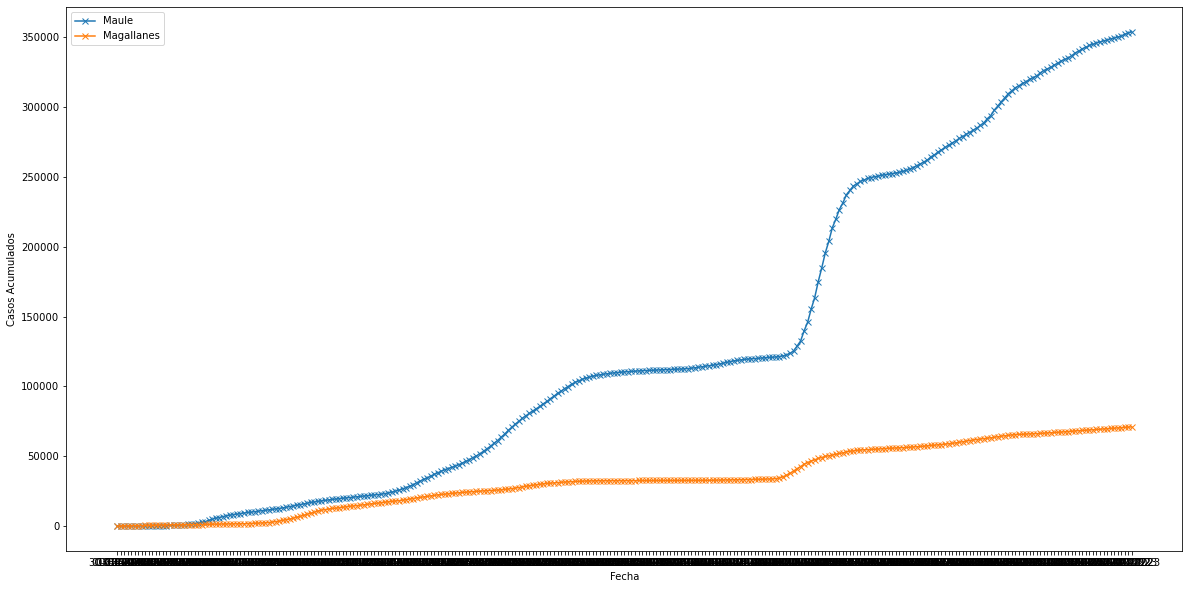

In [35]:
fig = plt.figure(figsize=(20,10))
plt.plot(enfermos_por_region.loc['Maule'][columnas], 'x-', label='Maule')
plt.plot(enfermos_por_region.loc['Magallanes'][columnas], 'x-', label='Magallanes')
plt.legend()
plt.xlabel('Fecha')
plt.ylabel('Casos Acumulados')
plt.show()

### 5.4 Puntaje de premio

Con esto, ¿Cómo podríamos calcular en qué fecha fue el mayor aumento de casos en cada Región? 

Los tres primeros estudiantes que manden a nuestro correo el Jupyter Notebook con el código implementado para contestar esta pregunta tendrán 0.1 adicional en la Tarea 01. Debe venir la salida indicando la fecha, en cada región, con el mayor aumento de casos y el código de cómo lo lograron calcular.

#### Posible forma de abordar el problema

La siguiente es la respuesta entergada por Nicolás Ortiz a esta pregunta:

In [36]:
# Respuesta de Nicolas Ortiz
enfermos_por_region.drop(columns=["Tasa"], inplace=True)

espacios_tabla = "|{:19}|{:11}|"
print(espacios_tabla.format("REGION", "FECHA"))
for index, row in enfermos_por_region.iterrows():
    index_max = 0
    dia_anterior = 0
    num_mayor = 0 
    for i, dia_actual in enumerate(row[4:]):
        dif_dia = dia_actual  - dia_anterior
        dia_anterior = dia_actual
        if dif_dia > num_mayor:
            num_mayor = dif_dia
            index_max = i
    print(espacios_tabla.format(index, enfermos_por_region.columns[index_max + 4]))

|REGION             |FECHA      |
|Antofagasta        |28-01-2022 |
|Araucanía          |18-02-2022 |
|Arica y Parinacota |28-01-2022 |
|Atacama            |11-02-2022 |
|Aysén              |11-02-2022 |
|Biobío             |18-02-2022 |
|Coquimbo           |04-02-2022 |
|Los Lagos          |18-02-2022 |
|Los Ríos           |11-02-2022 |
|Magallanes         |04-02-2022 |
|Maule              |18-02-2022 |
|Metropolitana      |19-06-2020 |
|O’Higgins          |18-02-2022 |
|Tarapacá           |28-01-2022 |
|Valparaíso         |11-02-2022 |
|Ñuble              |25-02-2022 |
